In [1]:
import json
import pandas as pd
 

In [2]:
# test.json 내용: [{"name":"Jack","age":26},{"name":"Ace","age":87}]
df = pd.read_json('salary.json') ## pd.read_json 이용

In [3]:
df = df.reset_index().rename(columns={'index':'year'})

In [4]:
df = df.sort_values(by = 'year').reset_index(drop=True)

In [5]:
year_list = [2021, 2022, 2023, 2024]

In [6]:
df = df[df['year'].isin(year_list)]

In [7]:
df_salary = df.melt(id_vars = 'year', value_vars = df.columns[1:], var_name = 'lang', value_name = 'salary')

In [8]:
df_salary = df_salary.dropna()

In [9]:
df_salary

,year,lang,salary
0,2021,clojure,95000.0
1,2022,clojure,106644.0
2,2023,clojure,96381.0
3,2024,clojure,95541.0
4,2021,f#,81037.0
...,...,...,...
199,2024,gdscript,60684.0
202,2023,vb.net,65000.0
203,2024,vb.net,63694.0
207,2024,micropython,75184.0


In [10]:
filtered_df = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)] = df_salary[df_salary['lang'].isin(df_salary['lang'].value_counts()[lambda x: x == len(year_list)].index)]

In [11]:
filtered_df

,year,lang,salary
0,2021,clojure,95000.0
1,2022,clojure,106644.0
2,2023,clojure,96381.0
3,2024,clojure,95541.0
4,2021,f#,81037.0
...,...,...,...
147,2024,php,49586.0
148,2021,dart,32986.0
149,2022,dart,43724.0
150,2023,dart,55862.0


In [12]:
filtered_df['CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()

/tmp/ipykernel_1793625/3277531322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CID'] = filtered_df.sort_values(by = ['lang', 'year'], ascending=[True, True]).groupby(['lang'])['salary'].diff()


In [13]:
filtered_df = filtered_df.dropna().reset_index(drop=True)

In [ ]:
list(filtered_df.loc[filtered_df['year'] == 2022,  'CID'])

0      11644.0
3      14489.0
6      12882.0
9      22923.0
12     10073.0
15     13000.0
18     14948.0
21      9517.0
24     13535.0
27     19331.0
30     10318.0
33     12290.0
36     10326.0
39      9260.0
42     13229.0
45     12738.0
48     18306.0
51     11651.0
54      8280.0
57     11104.0
60     19558.0
63     11148.0
66     12880.0
69     19789.0
72     14247.0
75     13951.0
78     11531.0
81      8503.0
84     14002.0
87     11004.0
90     23252.0
93     12684.0
96     17280.0
99     13640.0
102    11580.0
105    10738.0
Name: CID, dtype: float64

In [22]:
filtered_df

,year,lang,salary,CID
0,2022,clojure,106644.0,11644.0
1,2023,clojure,96381.0,-10263.0
2,2024,clojure,95541.0,-840.0
3,2022,f#,95526.0,14489.0
4,2023,f#,99311.0,3785.0
...,...,...,...,...
103,2023,php,58899.0,8403.0
104,2024,php,49586.0,-9313.0
105,2022,dart,43724.0,10738.0
106,2023,dart,55862.0,12138.0


In [28]:
filtered_df['year'] ==2021

0      False
1      False
2      False
3      False
4      False
       ...  
103    False
104    False
105    False
106    False
107    False
Name: year, Length: 108, dtype: bool

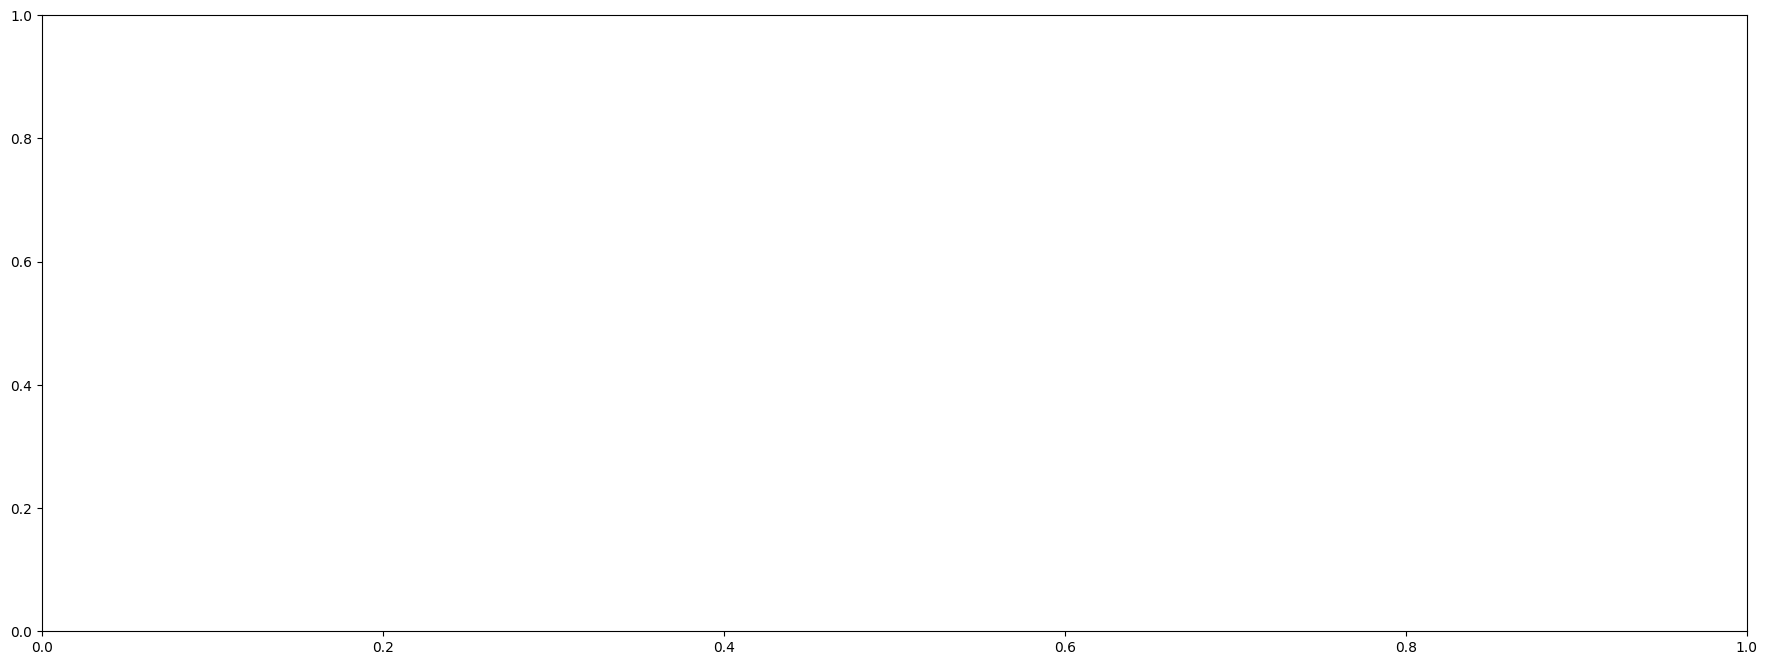

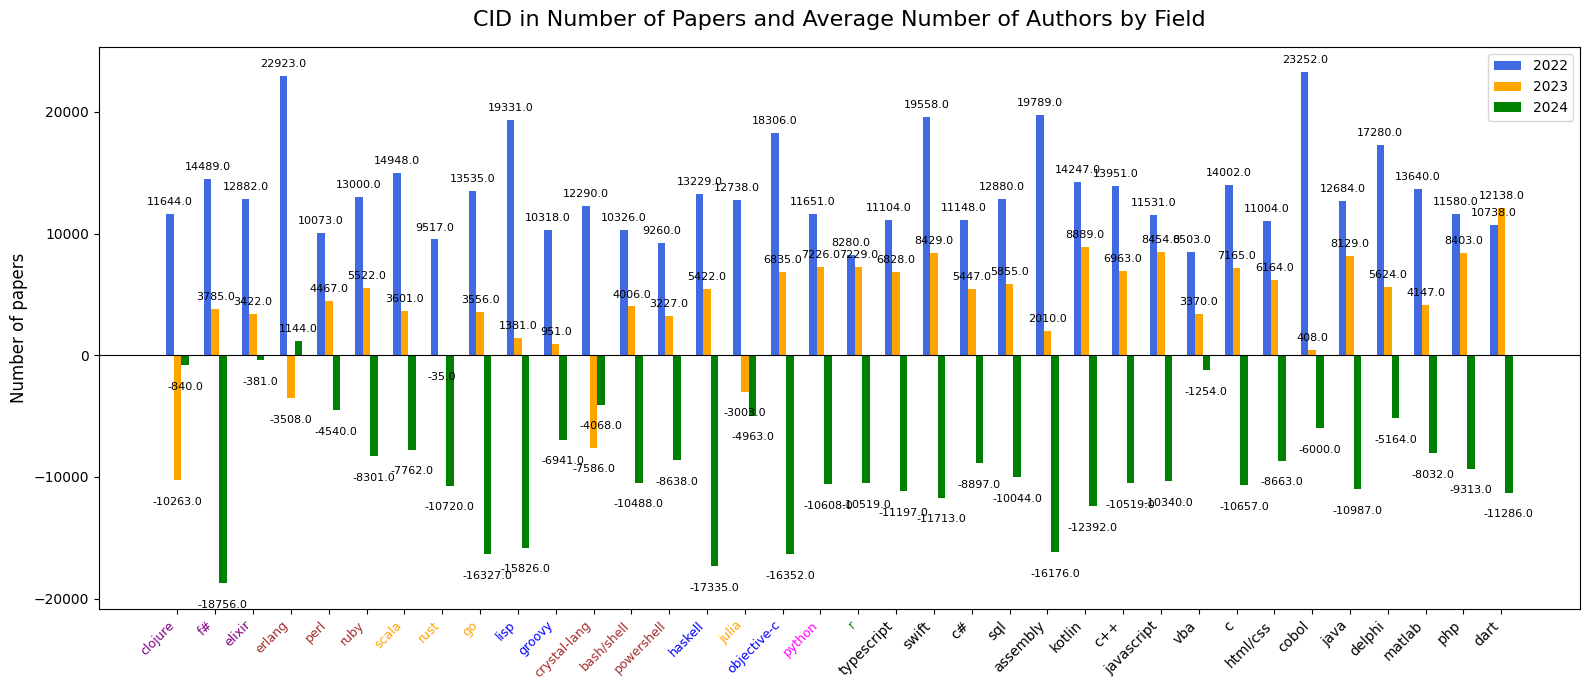

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학문 분야
lang_list = filtered_df['lang'].unique()

# 2019년 - 2020년 논문 수 차이 (가상의 데이터, 이미지 기준 추정)
cid_2022 = list(filtered_df.loc[filtered_df['year'] == 2022,  'CID'])
cid_2023 = list(filtered_df.loc[filtered_df['year'] == 2023,  'CID'])
cid_2024 = list(filtered_df.loc[filtered_df['year'] == 2024,  'CID'])

# 색상 매핑 (이미지 기준)
field_colors = [
    "purple", "purple", "purple",         # Humanities
    "brown", "brown", "brown",            # Natural Science
    "orange", "orange", "orange",         # Social Science
    "blue", "blue",                       # Applied Science
    "brown", "brown", "brown",            # Natural Science
    "blue", "orange", "blue",             # Applied, Social, Applied
    "magenta", "green"                    # Biology, Medicine
]


# 각 그룹 간의 간격 확보를 위해 x 위치 재조정
group_gap = 1.0
x = np.arange(len(lang_list)) * group_gap

# 막대 너비와 위치 설정
bar_width = 0.2
offsets = [-bar_width, 0, bar_width]  # 3개 년도

# 그래프 그리기
fig, ax = plt.subplots(figsize=(22, 8))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(16, 7))

# 각 연도별 바 플로팅
bars_2022 = ax.bar(x + offsets[0], cid_2022, bar_width, label="2022", color='royalblue')
bars_2023 = ax.bar(x + offsets[1], cid_2023, bar_width, label="2023", color='orange')
bars_2024 = ax.bar(x + offsets[2], cid_2024, bar_width, label="2024", color='green')

# 수치 라벨 붙이기
# def add_labels(bars):
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height}',
#                     xy=(bar.get_x() + bar.get_width()/2, height),
#                     xytext=(0, 5 if height >= 0 else -12),
#                     textcoords="offset points",
#                     ha='center', va='bottom' if height >= 0 else 'top',
#                     fontsize=8)






add_labels(bars_2022)
add_labels(bars_2023)
add_labels(bars_2024)

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(lang_list, rotation=45, ha='right')
for label, color in zip(ax.get_xticklabels(), field_colors):
    label.set_color(color)
    label.set_fontsize(9)

ax.set_title("CID in Number of Papers and Average Number of Authors by Field", fontsize=16, pad=15)
ax.set_ylabel("Number of papers", fontsize=12)
ax.axhline(0, color='black', linewidth=0.8)
ax.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

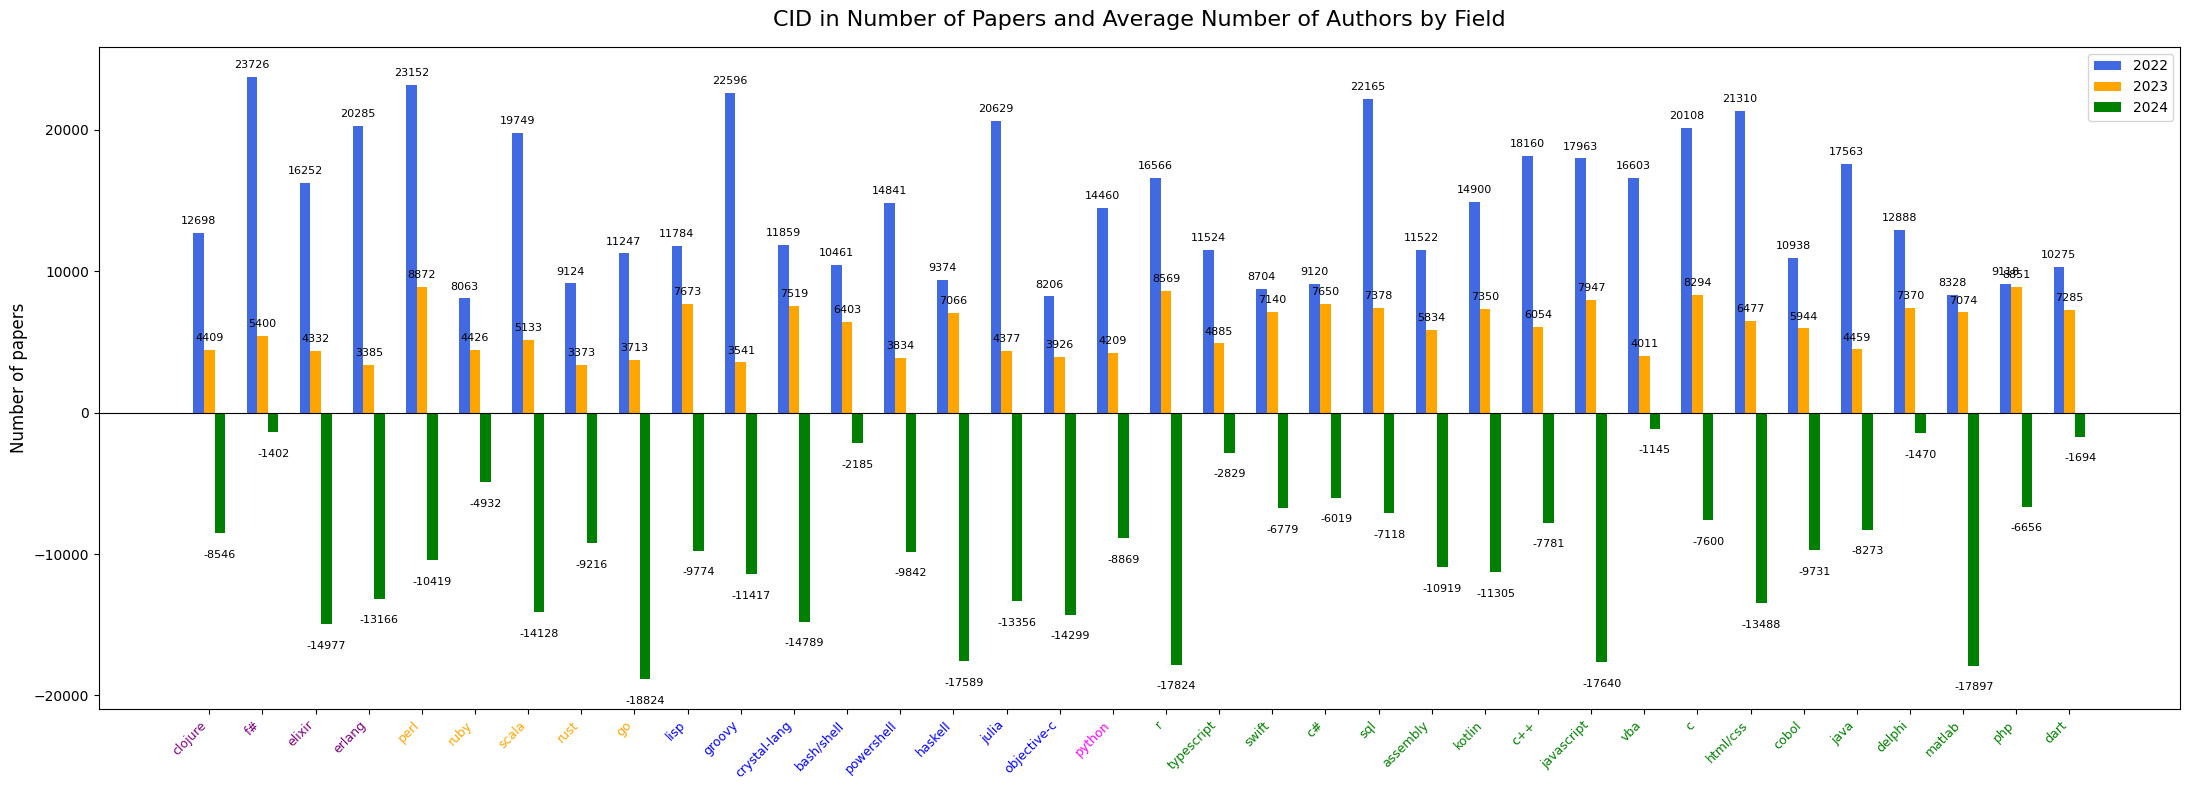

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 샘플 데이터
fields = [
    "clojure", "f#", "elixir", "erlang", "perl", "ruby", "scala", "rust", "go",
    "lisp", "groovy", "crystal-lang", "bash/shell", "powershell", "haskell", "julia",
    "objective-c", "python", "r", "typescript", "swift", "c#", "sql", "assembly",
    "kotlin", "c++", "javascript", "vba", "c", "html/css", "cobol", "java", "delphi",
    "matlab", "php", "dart"
]

# 각 년도별 데이터
cid_2022 = np.random.randint(8000, 24000, len(fields))
cid_2023 = np.random.randint(3000, 9000, len(fields))
cid_2024 = -np.random.randint(1000, 19000, len(fields))

# 색상 매핑
colors = [
    "purple", "purple", "purple", "purple", "orange", "orange", "orange", "orange", "orange",
    "blue", "blue", "blue", "blue", "blue", "blue", "blue",
    "blue", "magenta", "green", "green", "green", "green", "green", "green",
    "green", "green", "green", "green", "green", "green", "green", "green", "green",
    "green", "green", "green"
]

# 각 그룹 간의 간격 확보를 위해 x 위치 재조정
group_gap = 1.0
x = np.arange(len(fields)) * group_gap

# 막대 너비와 위치 설정
bar_width = 0.2
offsets = [-bar_width, 0, bar_width]  # 3개 년도

# 그래프 그리기
fig, ax = plt.subplots(figsize=(22, 8))

# 각 연도별 바 플로팅
bars_2022 = ax.bar(x + offsets[0], cid_2022, bar_width, label="2022", color='royalblue')
bars_2023 = ax.bar(x + offsets[1], cid_2023, bar_width, label="2023", color='orange')
bars_2024 = ax.bar(x + offsets[2], cid_2024, bar_width, label="2024", color='green')

# 수치 라벨 붙이기
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5 if height >= 0 else -12),
                    textcoords="offset points",
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8)

add_labels(bars_2022)
add_labels(bars_2023)
add_labels(bars_2024)

# 축, 라벨, 범례
ax.set_xticks(x)
ax.set_xticklabels(fields, rotation=45, ha='right')
for label, color in zip(ax.get_xticklabels(), colors):
    label.set_color(color)
    label.set_fontsize(9)

ax.set_title("CID in Number of Papers and Average Number of Authors by Field", fontsize=16, pad=15)
ax.set_ylabel("Number of papers", fontsize=12)
ax.axhline(0, color='black', linewidth=0.8)
ax.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()
